In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()/df.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone']]

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
df['age'] = imp.fit_transform(df[['age']])

imp_mode = SimpleImputer(strategy='most_frequent')
df['embarked'] = imp_mode.fit_transform(df[['embarked']])
df['embark_town'] = imp_mode.fit_transform(df[['embark_town']])

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
df.shape

(891, 14)

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,891,891,891,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,646,537,646,549


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [ ]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537,537,646,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

In [ ]:
df['adult_male'] = pd.get_dummies(df['adult_male'], drop_first=True)
df['alive'] = pd.get_dummies(df['alive'], drop_first=True)
df['alone'] = pd.get_dummies(df['alone'], drop_first=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,1,Southampton,0,0
1,1,1,0,38.0,1,0,71.2833,C,First,woman,0,Cherbourg,1,0
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,0,Southampton,1,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,0,Southampton,1,0
4,0,3,1,35.0,0,0,8.0500,S,Third,man,1,Southampton,0,1


In [ ]:
df.describe(include='object')

,embarked,who,embark_town
count,891,891,891
unique,3,3,3
top,S,man,Southampton
freq,646,537,646


In [ ]:
df[['embarked']].value_counts()

embarked
S           646
C           168
Q            77
dtype: int64

In [ ]:
df[['who']].value_counts()

who  
man      537
woman    271
child     83
dtype: int64

In [ ]:
df[['embark_town']].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
dtype: int64

In [ ]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import category_encoders as ce

In [ ]:
df.describe(include='object').columns

Index(['embarked', 'who', 'embark_town'], dtype='object')

In [ ]:
encoder = ce.OrdinalEncoder(cols=['embarked', 'who', 'embark_town','class'])
df = encoder.fit_transform(df)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,0,0
1,1,1,0,38.0,1,0,71.2833,2,2,2,0,2,1,0
2,1,3,0,26.0,0,0,7.9250,1,1,2,0,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,0,1,1,0
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,0,1


In [ ]:
df.emnbark_town

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('survived', axis=1)
y = df['survived']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state=21, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(classification_report(y_train_pred, y_train))

NameError: ignored

In [ ]:
from sklearn.metrics import plot_confusion_matrix

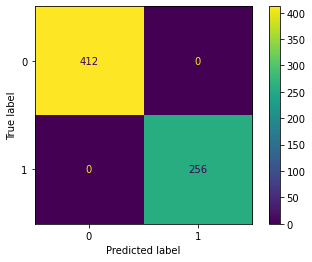

In [ ]:
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

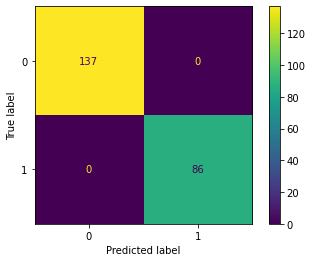

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.tree import plot_tree

[Text(167.4, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.473\nsamples = 668\nvalue = [412, 256]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 412\nvalue = [412, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 256\nvalue = [0, 256]')]

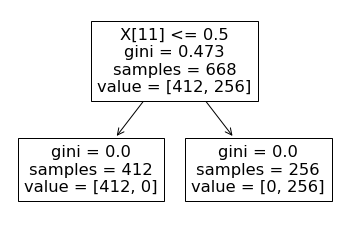

In [ ]:
plot_tree(clf.fit(X_train, y_train))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 13), (223, 13), (668,), (223,))

In [ ]:
df.shape

(891, 14)

In [ ]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf2.fit(X_train,y_train)
print(classification_report(clf2.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       256

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668

